In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.ticker as mtick
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', weight='normal')

0.6415711497986376 0.8612868451990929 0.9503397306098088


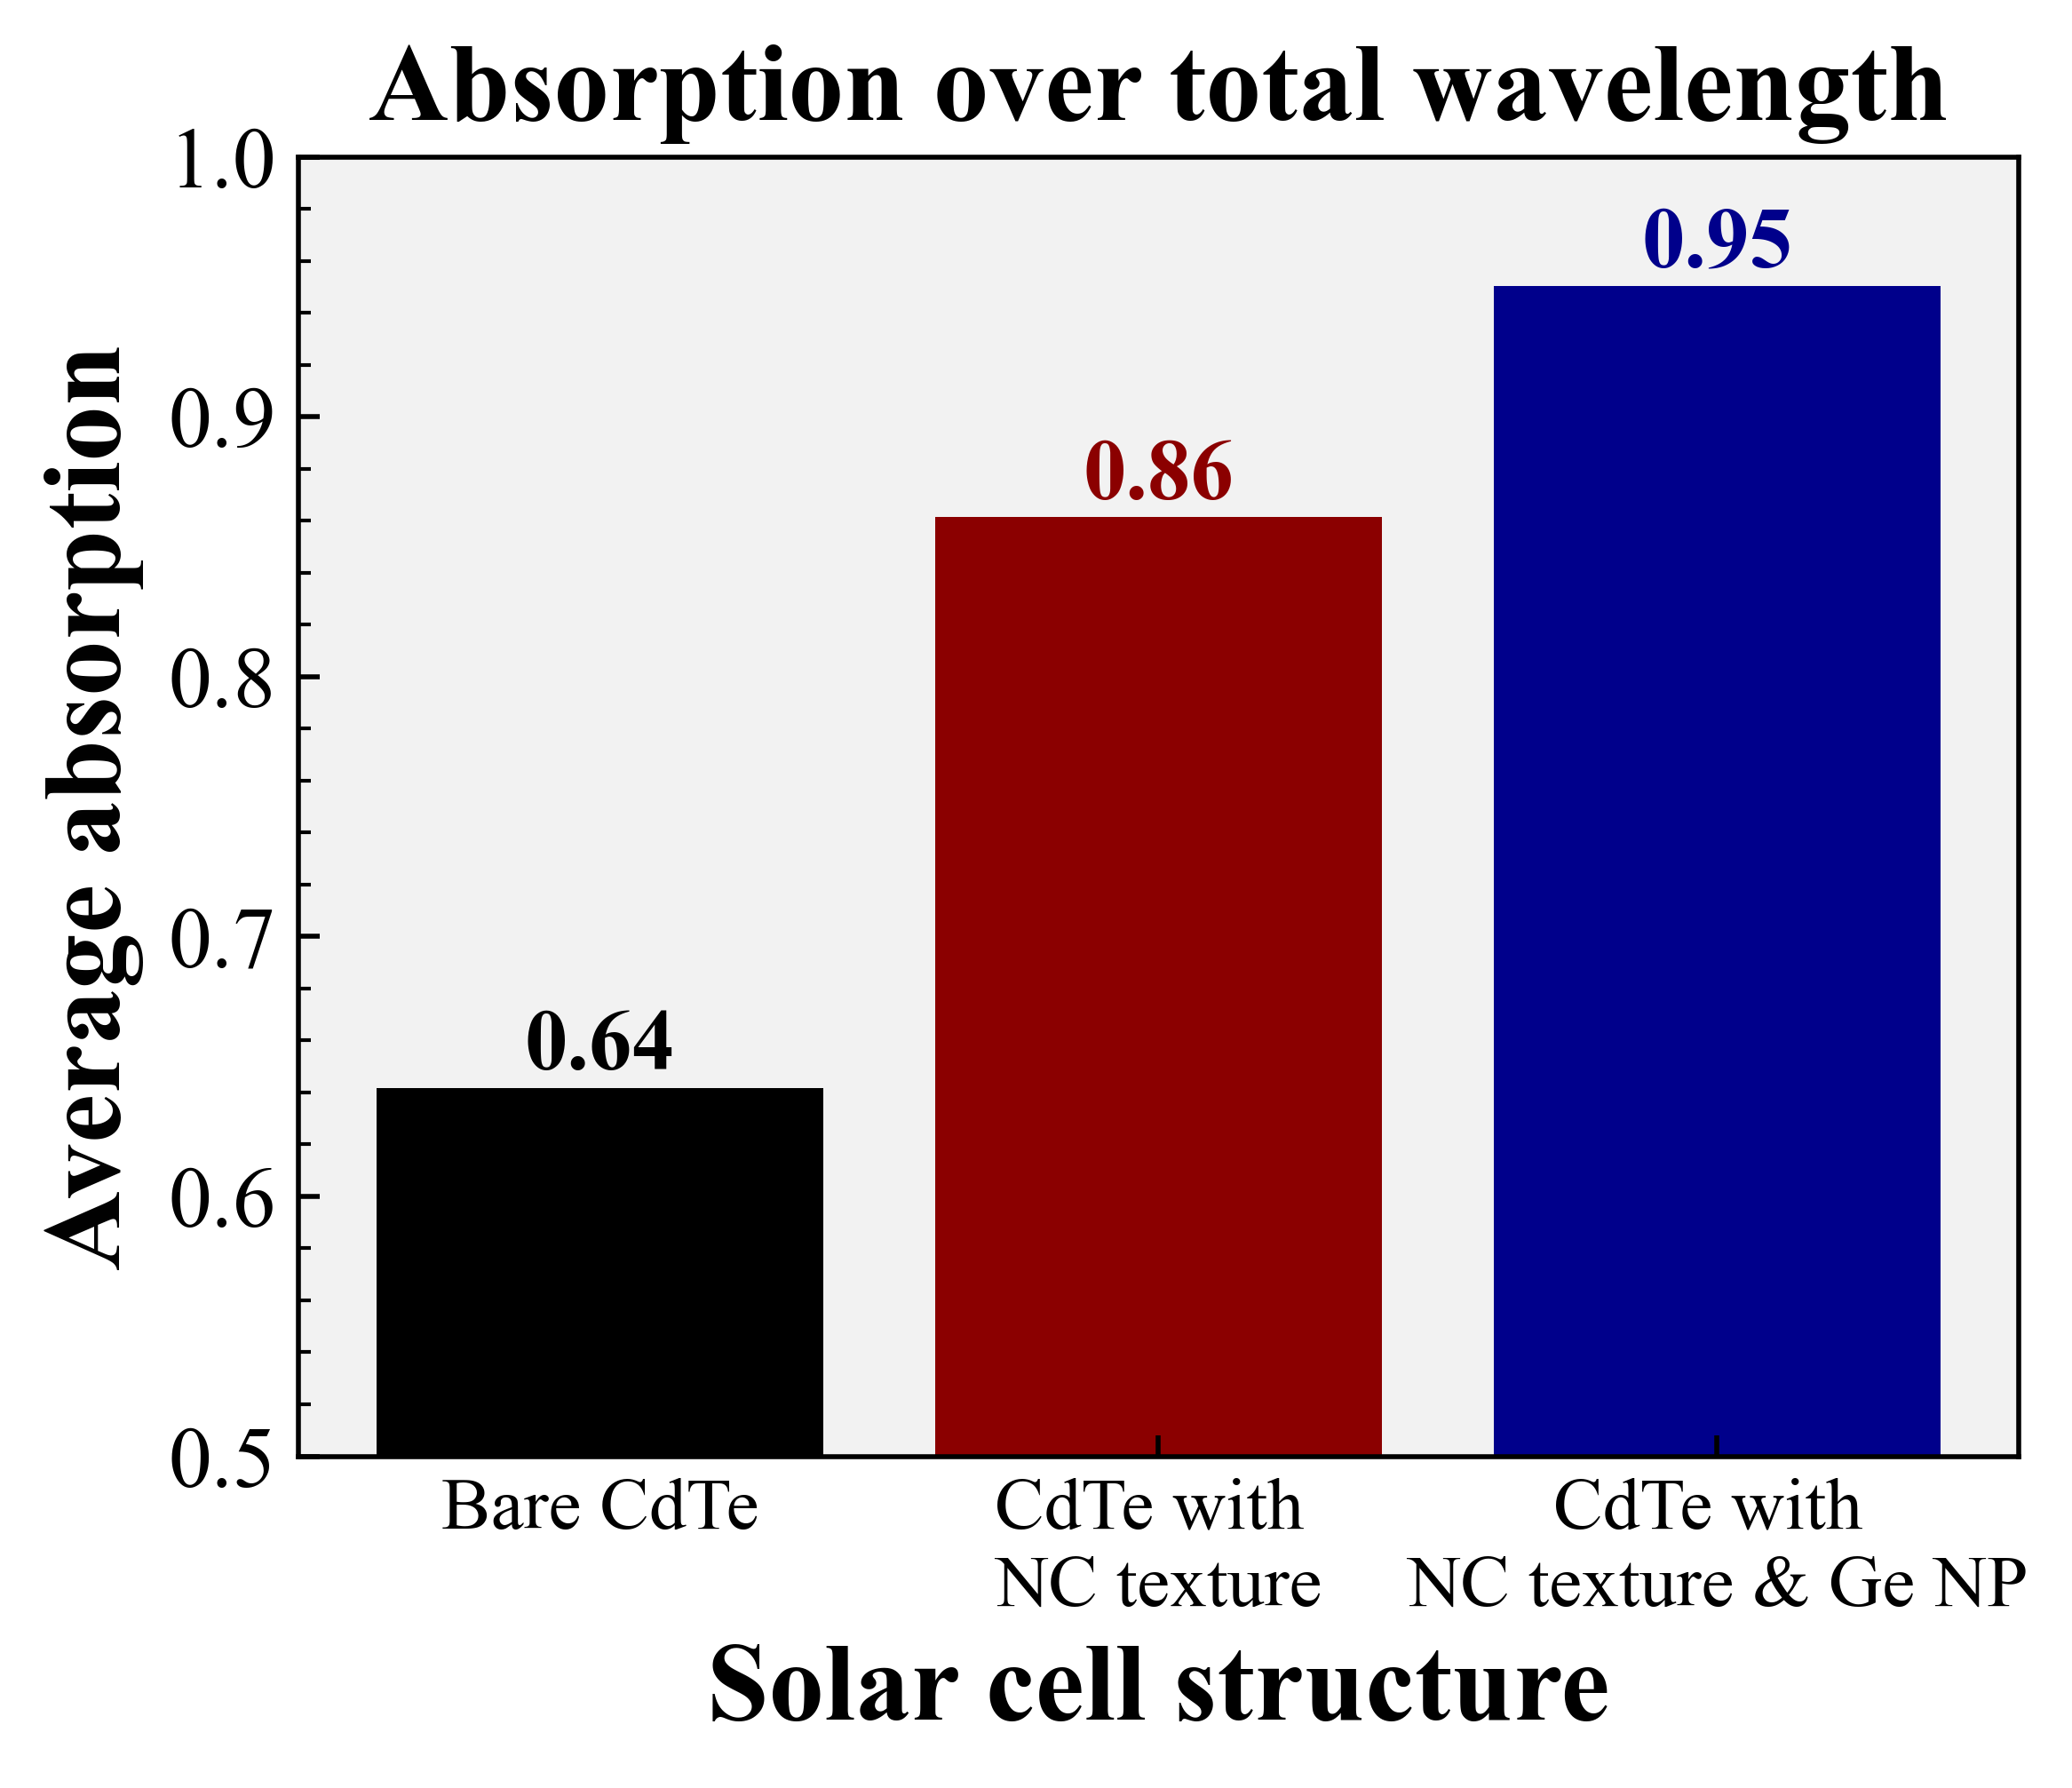

In [6]:
import h5py

# Load MATLAB data file
mat_file = h5py.File('COMBINED.mat')


# Extract data from file and assign to variables
f = mat_file['f'][:]
a1 = mat_file['A_bare'][:]
a2 = mat_file['A_st'][:]
a3 = mat_file['A_stnp'][:]


lightspeed = 299792458  # m/s
wavelength = (lightspeed*1e9)/f

# Transpose the array
w = wavelength.T
A1 = a1.T
A2 = a2.T
A3 = a3.T

#--------------------------------#

x = np.array(w).flatten()

y1 = np.array(A1).flatten()
y2 = np.array(A2).flatten()
y3 = np.array(A3).flatten()

total_absorption = (1100-400)*1     # wavelength range of the source

bare_avg_abs = integrate.simpson(y1, x)/total_absorption
np_avg_abs = integrate.simpson(y2, x)/total_absorption
st_avg_abs = integrate.simpson(y3, x)/total_absorption

print(bare_avg_abs, np_avg_abs, st_avg_abs)

#--------------------------------#

fig, ax = plt.subplots(dpi=500,figsize=(5, 3.8))  # Set DPI to 500
# fig, ax = plt.subplots()

texture = [ 'Bare CdTe', 'CdTe with \nNC texture', 'CdTe with \nNC texture & Ge NP']
value = [bare_avg_abs, np_avg_abs, st_avg_abs]

ax.set_xlabel('Solar cell structure', weight='bold',fontsize=18)
ax.set_ylabel('Average absorption', weight='bold',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('Absorption over total wavelength', weight='bold',fontsize=18)


# Set the y-axis range from 25 to 30
ax.set_ylim(.5, 1)


bars = ax.bar(texture, value, label=['black', 'darkred', 'darkblue'], color=['black', 'darkred', 'darkblue'])


# Define your list of colors
colors = ['black', 'darkred', 'darkblue']

# Add labels on top of each bar with custom colors
for bar, color in zip(bars, colors):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, weight='bold', color=color)


# Change background shade to yellow with transparency
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)

# Customize tick marks (inside, bigger size, and thicker)
ax.tick_params(direction='in', which='both')
ax.tick_params(axis='y', labelsize = 14)
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator())  # Enables minor ticks only for y-axis

plt.savefig('avg_abs_total.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()



<>:63: SyntaxWarning: invalid escape sequence '\l'
<>:63: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_11948\3510952939.py:63: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('Absorption within $\lambda$ = 400-800 nm', weight='bold',fontsize=18)


0.8057885759557629 0.9795193719740277 0.9794822920160245


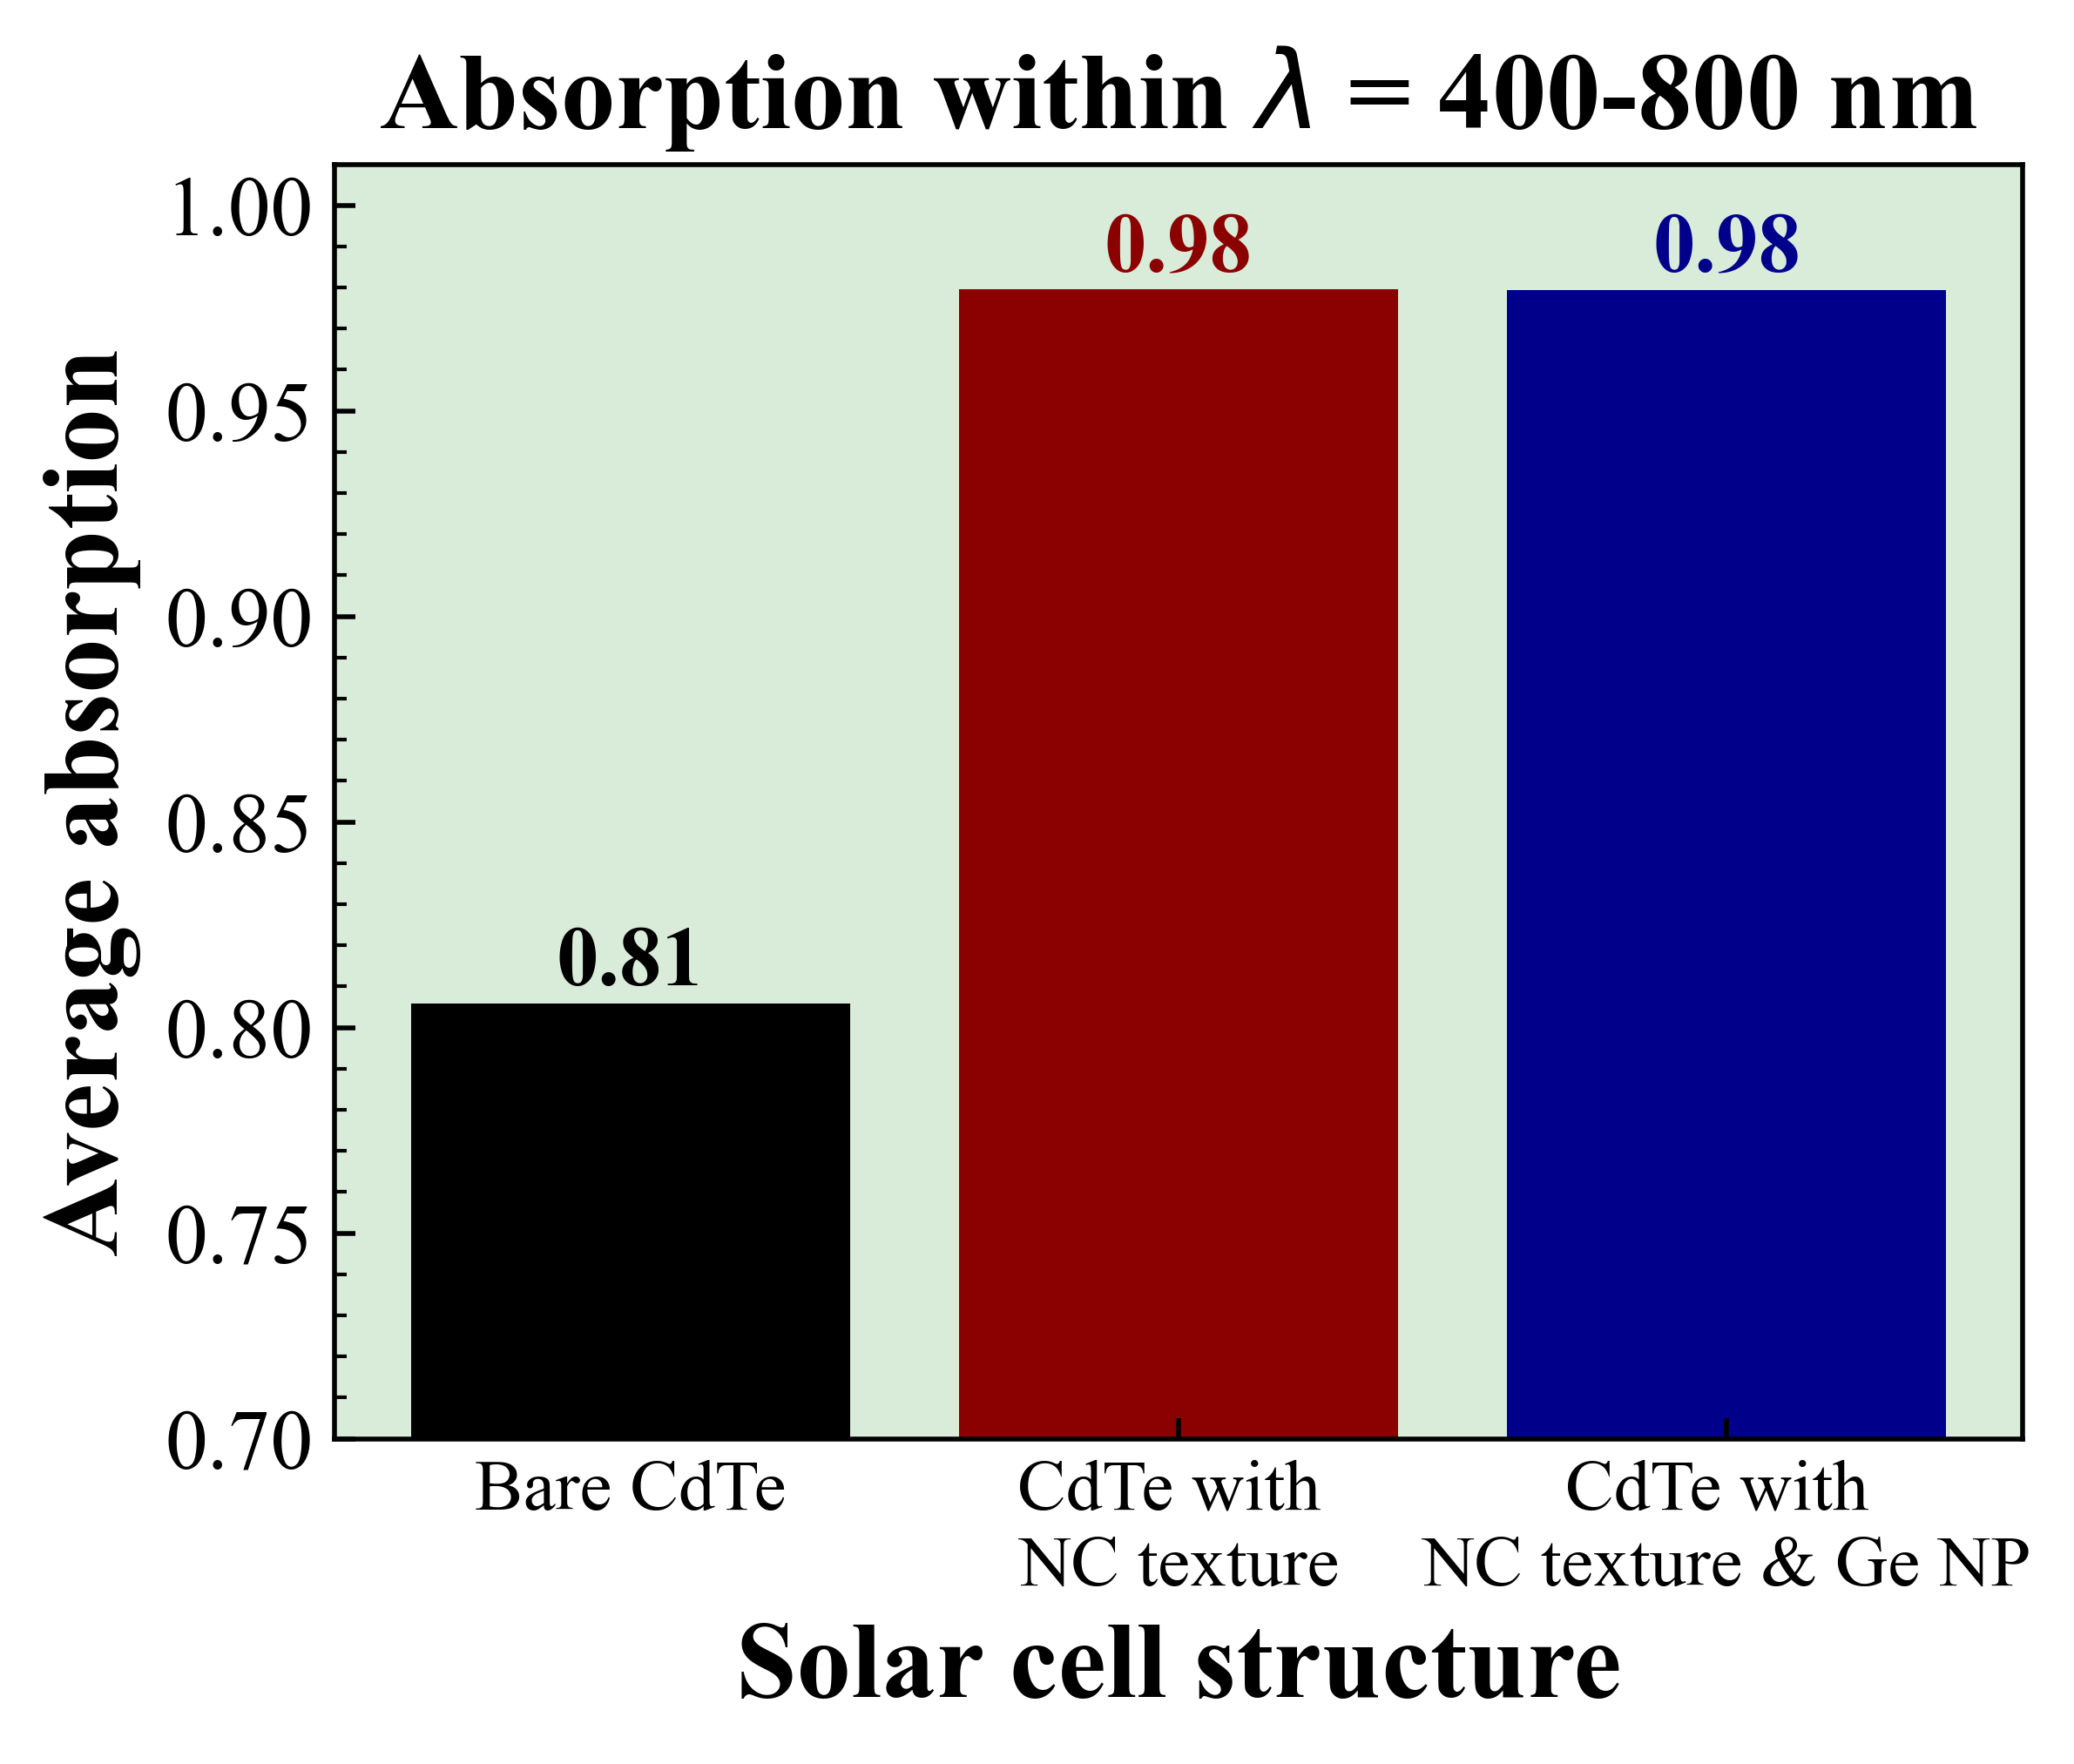

In [7]:
import h5py

# Load MATLAB data file
mat_file = h5py.File('COMBINED.mat')


# Extract data from file and assign to variables
f = mat_file['f'][:]
a1 = mat_file['A_bare'][:]
a2 = mat_file['A_st'][:]
a3 = mat_file['A_stnp'][:]


lightspeed = 299792458  # m/s
wavelength = (lightspeed*1e9)/f

# Transpose the array
w = wavelength.T
A1 = a1.T
A2 = a2.T
A3 = a3.T

#--------------------------------#

x = np.array(w).flatten()

y1 = np.array(A1).flatten()
y2 = np.array(A2).flatten()
y3 = np.array(A3).flatten()

x_till_860nm = x[:571]
# x_after_860nm = x[-160:]

# Cut the first 840 values and the last 160 values of y1
y1_till_860nm = y1[:571]
# y1_after_860nm = y1[-160:]

y2_till_860nm = y2[:571]
# y2_after_860nm = y2[-160:]

y3_till_860nm = y3[:571]
# y3_after_860nm = y3[-160:]

total_absorption = (800-400)*1     # wavelength range of the source

bare_avg_abs = integrate.simpson(y1_till_860nm, x_till_860nm)/total_absorption
np_avg_abs = integrate.simpson(y2_till_860nm, x_till_860nm)/total_absorption
st_avg_abs = integrate.simpson(y3_till_860nm, x_till_860nm)/total_absorption

print(bare_avg_abs, np_avg_abs, st_avg_abs)

#--------------------------------#

fig, ax = plt.subplots(dpi=500,figsize=(5, 3.8))  # Set DPI to 500

texture = [ 'Bare CdTe', 'CdTe with \nNC texture', 'CdTe with \nNC texture & Ge NP']
value = [bare_avg_abs, np_avg_abs, st_avg_abs]

ax.set_xlabel('Solar cell structure', weight='bold',fontsize=18)
ax.set_ylabel('Average absorption', weight='bold',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('Absorption within $\lambda$ = 400-800 nm', weight='bold',fontsize=18)


# Set the y-axis range from 25 to 30
ax.set_ylim(.7, 1.01)


bars = ax.bar(texture, value, label=['black', 'darkred', 'darkblue'], color=['black', 'darkred', 'darkblue'])


# Define your list of colors
colors = ['black', 'darkred', 'darkblue']

# Add labels on top of each bar with custom colors
for bar, color in zip(bars, colors):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, weight='bold', color=color)


# Change background shade to yellow with transparency
ax.patch.set_facecolor('green')
ax.patch.set_alpha(0.15)


# Customize tick marks (inside, bigger size, and thicker)
ax.tick_params(direction='in', which='both')
ax.tick_params(axis='y', labelsize = 14)
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator())  # Enables minor ticks only for y-axis

plt.savefig('avg_abs_400_800nm.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()


<>:64: SyntaxWarning: invalid escape sequence '\l'
<>:64: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_11948\660909703.py:64: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('Absorption within $\lambda$ = 800-1100 nm', weight='bold',fontsize=18)


0.4205621716984525 0.7013116983419113 0.9091509413336822


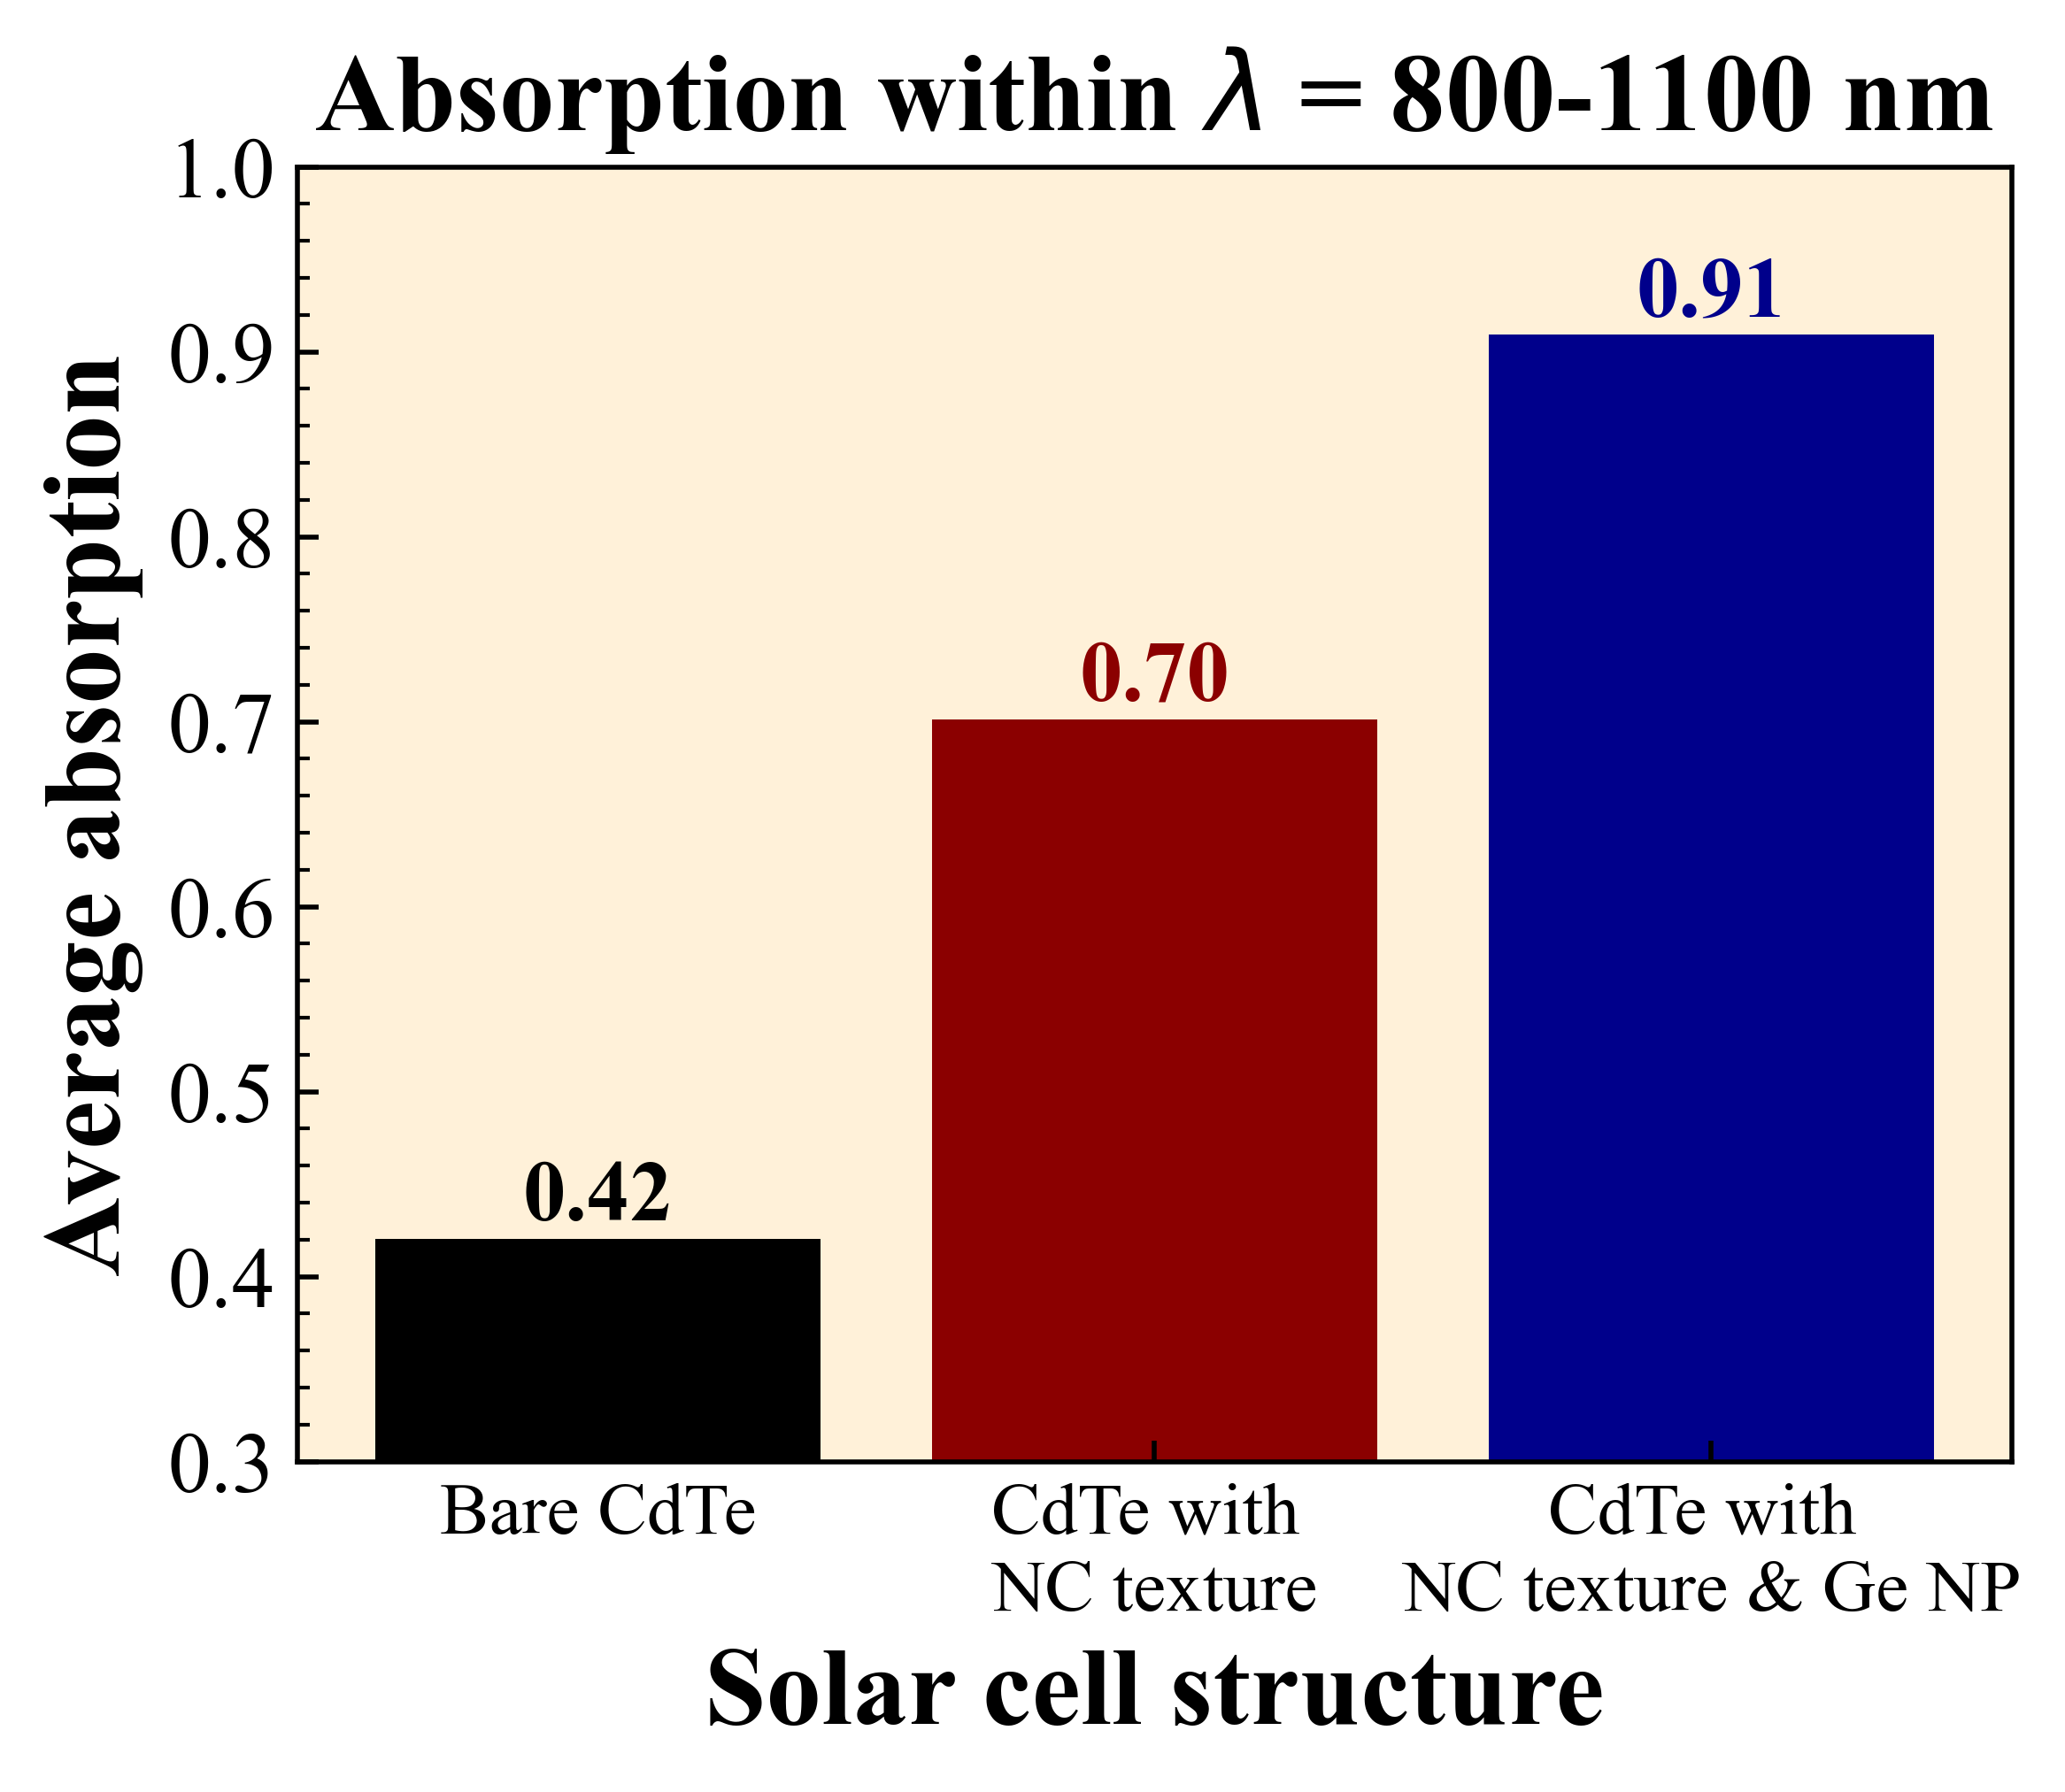

In [8]:
import h5py

# Load MATLAB data file
mat_file = h5py.File('COMBINED.mat')


# Extract data from file and assign to variables
f = mat_file['f'][:]
a1 = mat_file['A_bare'][:]
a2 = mat_file['A_st'][:]
a3 = mat_file['A_stnp'][:]


lightspeed = 299792458  # m/s
wavelength = (lightspeed*1e9)/f

# Transpose the array
w = wavelength.T
A1 = a1.T
A2 = a2.T
A3 = a3.T

#--------------------------------#

x = np.array(w).flatten()

y1 = np.array(A1).flatten()
y2 = np.array(A2).flatten()
y3 = np.array(A3).flatten()

# x_till_860nm = x[:840]
x_after_860nm = x[-429:]

# Cut the first 840 values and the last 160 values of y1
# y1_till_860nm = y1[:840]
y1_after_860nm = y1[-429:]

# y2_till_860nm = y2[:840]
y2_after_860nm = y2[-429:]

# y3_till_860nm = y3[:840]
y3_after_860nm = y3[-429:]

total_absorption = (1100-800)*1     # wavelength range of the source

bare_avg_abs = integrate.simpson(y1_after_860nm, x_after_860nm)/total_absorption
np_avg_abs = integrate.simpson(y2_after_860nm, x_after_860nm)/total_absorption
st_avg_abs = integrate.simpson(y3_after_860nm, x_after_860nm)/total_absorption

print(bare_avg_abs, np_avg_abs, st_avg_abs)

#--------------------------------#

fig, ax = plt.subplots(dpi=500,figsize=(5, 3.8))  # Set DPI to 500
# fig, ax = plt.subplots()

texture = [ 'Bare CdTe', 'CdTe with \nNC texture', 'CdTe with \nNC texture & Ge NP']
value = [bare_avg_abs, np_avg_abs, st_avg_abs]

ax.set_xlabel('Solar cell structure', weight='bold',fontsize=18)
ax.set_ylabel('Average absorption', weight='bold',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=13)
ax.set_title('Absorption within $\lambda$ = 800-1100 nm', weight='bold',fontsize=18)


# Set the y-axis range from 25 to 30
ax.set_ylim(.3, 1)


bars = ax.bar(texture, value, label=['black', 'darkred', 'darkblue'], color=['black', 'darkred', 'darkblue'])


# Define your list of colors
colors = ['black', 'darkred', 'darkblue']

# Add labels on top of each bar with custom colors
for bar, color in zip(bars, colors):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=14, weight='bold', color=color)

# Change background shade to yellow with transparency
ax.patch.set_facecolor('orange')
ax.patch.set_alpha(0.15)


# Customize tick marks (inside, bigger size, and thicker)
ax.tick_params(direction='in', which='both')
ax.tick_params(axis='y', labelsize = 14)
from matplotlib.ticker import AutoMinorLocator
ax.yaxis.set_minor_locator(AutoMinorLocator())  # Enables minor ticks only for y-axis

plt.savefig('avg_abs_800_1100nm.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

